<a href="https://colab.research.google.com/github/yudisdc1/Portofolio/blob/main/Matrix%20Decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LATIHAN 1 KOMPSTAT MATRIKS DEKOMPOSISI

Anggota Kelompok

*   Daffa Al Ghifary - 2006463420
*   Safira Mecca Lovani - 2006486550
*   Muhammad Hanif Pramudya Zamzami - 2006487566
*   Yudistira Dwi Cahya - 2006530942
*   Jeremi Okto Ricardo Marpaung - 2006568733

## Import Modul

In [ ]:
#import modul yang dibutuhkan
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
pd.set_option("display.max_colwidth", 200)

## Import Data

In [ ]:
#mengimport dataset dari libary sklearn.datasets berupa dokumen dari 20 newsgroup
from sklearn.datasets import fetch_20newsgroups

#menghilangkan format-format newsgroup
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))

#menyimpan dataset ke dalam variabel documents
documents = dataset.data

In [ ]:
#melihat elemen dari 2 index pertama
documents[:2]

["Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n",
 "\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap

In [ ]:
print("Total Documents: ", len(documents))

Total Documents:  11314


In [ ]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

## Preprocessing

In [ ]:
#simpan data dari list menjadi dataframe agar mempermudah pre-processing dan simpan di variabel news_df
news_df = pd.DataFrame({'document':documents})

#menghapus tanda baca, angka, dan semua karakter (kecuali huruf) dan mengubahnya menjadi spasi kosong
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")

#menghapus kata kata yang disingkat karena tidak memiliki informasi yang penting
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

#mengubah semua huruf menjadi huruf kecil agar ketika diproses, sensifitas dari programnya tidak berpengaruh
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

In [ ]:
#menghilangkan kata kata yang tidak ada maknanya, seperti ‘it’, ‘they’, ‘am’, ‘been’, ‘about’, ‘because’, ‘while’, 'the', dan lainnya

# impan stopword dimana kali ini menggunakan Spacy untuk stopwords (bisa juga gunakan NLIK)
from spacy.lang.en.stop_words import STOP_WORDS as stop_words

#  tokenisasi - memecah kalimat menjadi kata
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())

# menghilangkan stop words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

# detokenisasi - menggabungkan kembali kata menajadi kalimat
detokenized_doc = []
for i in range(len(news_df)):
    t = ' '.join(tokenized_doc[i])
    detokenized_doc.append(t)

news_df['clean_doc'] = detokenized_doc

In [ ]:
# akan digunakan ''sklearn’s TfidfVectorizer'' untuk membuat document-term matrix dengan 1000 term (words)
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english',
max_features= 1000, # keep top 1000 terms
max_df = 0.5,
smooth_idf=True)

X = vectorizer.fit_transform(news_df['clean_doc'])

X.shape # check shape of the document-term matrix

(11314, 1000)

In [ ]:
X.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.20185845, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.2321243 , 0.        ,
        0.        ]])

In [ ]:
print(str(vectorizer.vocabulary_)[:93])

{'sure': 870, 'story': 852, 'statement': 844, 'media': 534, 'israeli': 442, 'world': 985, 'ha


## Topic Modelling

In [ ]:
from sklearn.decomposition import TruncatedSVD

# SVD merepresentasikan document dan terms ke dalam vektor
svd_model = TruncatedSVD(n_components=20, algorithm='randomized', n_iter=100, random_state=122)

svd_model.fit(X)
Topic_X = svd_model.transform(X)

len(svd_model.components_)

20

In [ ]:
print(svd_model.fit(X))

TruncatedSVD(n_components=20, n_iter=100, random_state=122)


In [ ]:
terms = vectorizer.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ", end='', flush=True)
    for t in sorted_terms:
        print(t[0], end=' ', flush=True)
    print(" ")

Topic 0: like know people think good time thanks  
Topic 1: thanks windows card drive mail file advance  
Topic 2: game team year games season players good  
Topic 3: drive scsi hard disk card drives problem  
Topic 4: windows file window files program problem version  
Topic 5: government space chip mail information data encryption  
Topic 6: like bike chip sounds know looks look  
Topic 7: card sale video monitor offer price jesus  
Topic 8: know card chip video government people clipper  
Topic 9: good know time bike problem jesus work  
Topic 10: think good chip clipper need encryption people  
Topic 11: thanks problem right bike good window time  
Topic 12: good people windows know sale file files  
Topic 13: space think know nasa problem year israel  
Topic 14: space good card thanks people year nasa  
Topic 15: people problem game window time work want  
Topic 16: problem good window israel people know israeli  
Topic 17: file time problem need files mail game  
Topic 18: need r

In [ ]:
#untuk mengurangi dimensi digunakan TSNE
from sklearn.manifold import TSNE
embedding = TSNE(n_components=2).fit_transform(Topic_X)

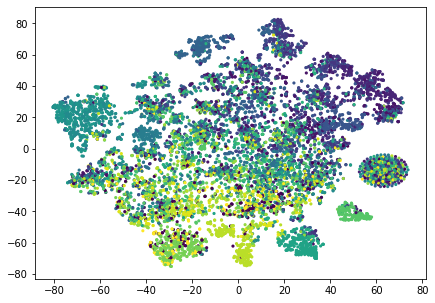

In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter(embedding[:, 0], embedding[:, 1],
c = dataset.target,
s = 10, # size
edgecolor='none'
)
plt.show()

Data dari data frame terlihat sudah dikelompokkan pada grafik di atas, selanjutnya akan diolah data berdasarkan topik-topik yang sudah ditemukan sebelumnya

In [ ]:
d1 = "like know people think good time thanks"
d2 = "thanks windows card drive mail file advance"
d3 = "game team year games season players good"
d4 = "drive scsi hard disk card drives problem"
d5 = "windows file window files program problem version"
d6 = "government space chip mail information data encryption"
d7 = "like bike chip sounds know looks look"
d8 = "card sale video monitor offer price jesus"
d9 = "know card chip video government people clipper"
d10 = "good know time bike problem jesus work"
d11 = "think good chip clipper need encryption people"
d12 = "thanks problem right bike good window time"
d13 = "good people windows know sale file files"
d14 = "space think know nasa problem year israel"
d15 = "space good card thanks people year nasa"
d16 = "people problem game window time work want"
d17 = "problem good window israel people know israeli"
d18 = "file time problem need files mail game"
d19 = "need right file card files want good"
d20 = "need time windows want israel window israeli"

# Data adalah kumpulan dokumen sehingga
D = [d1, d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12, d13, d14, d15, d16, d17, d18, d19, d20]

In [ ]:
sns.set(style="ticks", color_codes=True)
from sklearn.feature_extraction.text import CountVectorizer

vsm = CountVectorizer(binary = False, lowercase=True, stop_words='english')
A = vsm.fit_transform(D)

A.shape

(20, 52)

In [ ]:
type(A)

scipy.sparse.csr.csr_matrix

In [ ]:
A.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]])

In [ ]:
print(str(vsm.vocabulary_)[:93])

{'like': 22, 'know': 21, 'people': 30, 'think': 43, 'good': 14, 'time': 44, 'thanks': 42, 'wi


In [ ]:
# Solve dengan Numpy
U, s, V = np.linalg.svd(A.toarray())
print("ukuran-ukuran matriks = ",U.shape, s.shape, V.shape)
print(s)

ukuran-ukuran matriks =  (20, 20) (20,) (52, 52)
[5.65319837 3.75910616 3.49941505 3.00990531 2.96073816 2.8552461
 2.70671488 2.68242524 2.51265407 2.34290866 2.22585026 2.17819899
 2.07001375 1.88422163 1.74875623 1.58081741 1.46666141 1.33579494
 1.12988047 1.02900753]


In [ ]:
# Mari kita plot hasil diatas

x_kata = V[0,:] # Baris pertama matrix V = sumbu x kata
y_kata = V[1,:] # Baris kedua matrix V = sumbu y kata

# label dari setiap barisnya = kata-kata
# kita akan gunakan perintah yang sama dengan di segmen sebelum ini
print(vsm.vocabulary_)

{'like': 22, 'know': 21, 'people': 30, 'think': 43, 'good': 14, 'time': 44, 'thanks': 42, 'windows': 49, 'card': 2, 'drive': 7, 'mail': 25, 'file': 10, 'advance': 0, 'game': 12, 'team': 41, 'year': 51, 'games': 13, 'season': 38, 'players': 31, 'scsi': 37, 'hard': 16, 'disk': 6, 'drives': 8, 'problem': 33, 'window': 48, 'files': 11, 'program': 34, 'version': 45, 'government': 15, 'space': 40, 'chip': 3, 'information': 17, 'data': 5, 'encryption': 9, 'bike': 1, 'sounds': 39, 'looks': 24, 'look': 23, 'sale': 36, 'video': 46, 'monitor': 26, 'offer': 29, 'price': 32, 'jesus': 20, 'clipper': 4, 'work': 50, 'need': 28, 'right': 35, 'nasa': 27, 'israel': 18, 'want': 47, 'israeli': 19}


In [ ]:
idx_kata = dict(map(reversed, vsm.vocabulary_.items()))
Label = [idx_kata[i] for i in range(A.shape[0])]
print(Label)

['advance', 'bike', 'card', 'chip', 'clipper', 'data', 'disk', 'drive', 'drives', 'encryption', 'file', 'files', 'game', 'games', 'good', 'government', 'hard', 'information', 'israel', 'israeli']


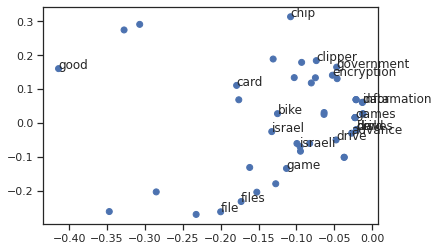

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(x_kata, y_kata, c=['b']*len(x_kata))
for i, L in enumerate(Label):
    ax.annotate(L, (x_kata[i],y_kata[i]))

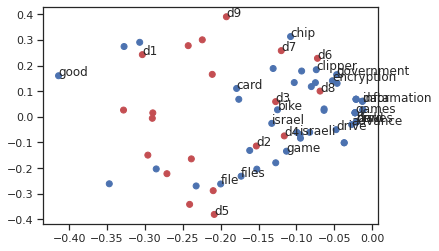

In [ ]:
# Mari kita gabungkan plot Kata dan Dokumen
x_judul = U[:,0] # Kolom pertama matrix U = sumbu x judul
y_judul = U[:,1] # Kolom kedua matrix U = sumbu y judul

Label_judul = ['d1','d2','d3','d4','d5','d6','d7','d8','d9']

# Saatnya kita plot
# Mulai dari "Words" terlebih dahulu dengan warna biru "b"
fig, ax = plt.subplots()
ax.scatter(x_kata, y_kata, c=['b']*len(x_kata))
for i, L in enumerate(Label):
    ax.annotate(L, (x_kata[i],y_kata[i]))

# Lalu judul (dokumen) dengan warna Merah "r"
ax.scatter(x_judul, y_judul, c=['r']*len(x_judul))
for i, L in enumerate(Label_judul):
    ax.annotate(L, (x_judul[i],y_judul[i]))
# Analisa Plotnya .... misal perhatikan kata "dummies"

# Kesimpulan

Dari hasil yang kami dapatkan berupa list kata-kata yang sering muncul dan juga visualisasi dari grafik, kami menemukan bahwa kata yang banyak muncul di antaranya adalah kata "chip", "windows", "clipper", "government", "encryption", "information", "card", "game", "files". Oleh karena itu, kami berasumsi bahwa topik yang sedang dibicarakan pada 20 newspaper tersebut berkaitan dengan informasi pengembangan teknologi komputer beserta keamanannya.